## Northwind Database Analysis with Hypothesis Testing

- Name: Uma Palaniappan
- Cohort: Part-Time 
- Blog post URL: https://umapalam.github.io/hypothesis_testing_with_northwind

### Introduction
- Examing Northwind database 
- Analyze the schema with SQL 

### Import Libraries 

In [249]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import sqlite3 and database
import sqlite3
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()
# import numpy, seaborn, and scipy 
import seaborn as sns 
import numpy as np 
# import significance levels, normality, anova tools
from scipy import stats 
import itertools 
import statsmodels.api as sm 
from statsmodels.formula.api import ols
# hide warnings
import warnings
warnings.filterwarnings('ignore') 

### List Tables

In [250]:
# List of all tables in schema 
c.execute("""SELECT name 
FROM sqlite_master 
WHERE type= 'table'
ORDER By name;""")
c.fetchall()

[('Category',),
 ('Customer',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Employee',),
 ('EmployeeTerritory',),
 ('Order',),
 ('OrderDetail',),
 ('Product',),
 ('Region',),
 ('Shipper',),
 ('Supplier',),
 ('Territory',)]

In [251]:
# turn the above code into a variable named tables 
tables = c.execute("""SELECT name
FROM sqlite_master 
WHERE type= 'table' 
"""). fetchall()
tables = [i[0] for i in tables]
print(tables)

['Employee', 'Category', 'Customer', 'Shipper', 'Supplier', 'Order', 'Product', 'OrderDetail', 'CustomerCustomerDemo', 'CustomerDemographic', 'Region', 'Territory', 'EmployeeTerritory']


In [252]:
# Loop to put all tables into pandas dataframes
dfs = []
for i in tables:
    table = c.execute('select * from "'+i+'"').fetchall()
    columns = c.execute('PRAGMA table_info("'+i+'")').fetchall()
    df = pd.DataFrame(table, columns=[i[1] for i in columns])
    # function to make a string into variable name
    conv = i+"_df"
    exec(conv + " = df") # => TableName_df
    # Keep all dataframe names in the list
    dfs.append(conv)
    print(conv)

Employee_df
Category_df
Customer_df
Shipper_df
Supplier_df
Order_df
Product_df
OrderDetail_df
CustomerCustomerDemo_df
CustomerDemographic_df
Region_df
Territory_df
EmployeeTerritory_df


### EDA (Exploratory Data Analysis)

In [253]:
# OrderDetail table has Discont 
c.execute("""SELECT * FROM 
OrderDetail""")
c.fetchall()

[('10248/11', 10248, 11, 14, 12, 0.0),
 ('10248/42', 10248, 42, 9.8, 10, 0.0),
 ('10248/72', 10248, 72, 34.8, 5, 0.0),
 ('10249/14', 10249, 14, 18.6, 9, 0.0),
 ('10249/51', 10249, 51, 42.4, 40, 0.0),
 ('10250/41', 10250, 41, 7.7, 10, 0.0),
 ('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10251/65', 10251, 65, 16.8, 20, 0.0),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10252/60', 10252, 60, 27.2, 40, 0.0),
 ('10253/31', 10253, 31, 10, 20, 0.0),
 ('10253/39', 10253, 39, 14.4, 42, 0.0),
 ('10253/49', 10253, 49, 16, 40, 0.0),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10254/74', 10254, 74, 8, 21, 0.0),
 ('10255/2', 10255, 2, 15.2, 20, 0.0),
 ('10255/16', 10255, 16, 13.9, 35, 0.0),
 ('10255/36', 10255, 36, 15.2, 25, 0.0),
 ('10255/59', 10255, 59, 44, 30, 0.0),
 ('10256/53', 10256, 53, 26.2,

In [254]:
df = pd.read_sql_query("""SELECT * FROM 
OrderDetail""", conn)
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [255]:
df = pd.read_sql_query("""SELECT * FROM 
OrderDetail""", conn)

Text(0.5, 1.0, 'Average Quantity by Discount')

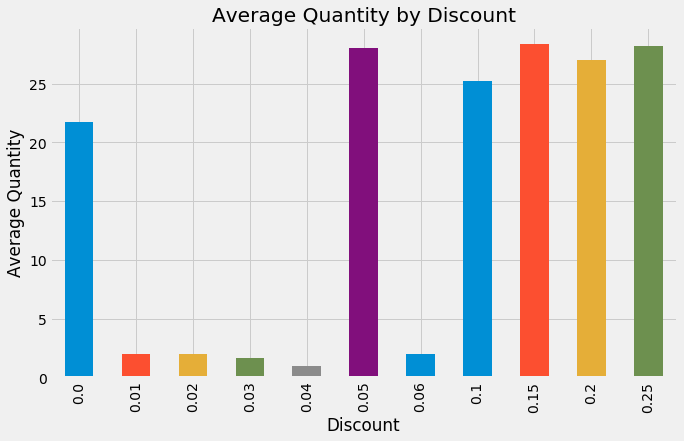

In [256]:
plt.style.use('fivethirtyeight')
Discount = df.groupby('Discount')['Quantity'].mean().plot(kind='bar', figsize=(10,6))
Discount.set_ylabel('Average Quantity')
Discount.set_title('Average Quantity by Discount')

In [257]:
df2 = pd.read_sql_query("""SELECT * FROM 
Product""", conn)
df2.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [258]:
df5 = pd.read_sql_query("""SELECT Country, City FROM 
Supplier""", conn)
df5.head()

,Country,City
0,UK,London
1,USA,New Orleans
2,USA,Ann Arbor
3,Japan,Tokyo
4,Spain,Oviedo


In [259]:
df6 = pd.read_sql_query("""SELECT * FROM 
'Order'""", conn)
df6.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [260]:
df7 = pd.read_sql_query("""SELECT * FROM 
Shipper""", conn)
df7.head()

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


### Helper Functions

In [261]:
def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    return abs(d)

In [262]:
def cohen_d(a,b, describe = True):
    a_n,b_n = len(a),len(b)
    pv_num = ((a_n-1)*a.var())+((b_n-1)*b.var())
    pv_den = a_n+b_n
    pooled_sd = np.sqrt(pv_num/pv_den)
    d = (a.mean()-b.mean())/pooled_sd
    if describe:
        print("Cohens'd: ",d)
        if d<0.50:
            print('Effect Size: Small')
        elif d<0.80:
            print('Effect Size: Medium')
        else:
            print('Effect Size: Large')
    return d

In [263]:
def ANOVA(formula,data, decision=True):
    lm = ols(formula,data).fit()
    result = sm.stats.anova_lm(lm, typ=1)
    if decision:
        if result['PR(>F)'][0]>0.05:
            print('Fail to reject the Null Hypothesis')
        else:
            print('Reject the Null Hypothesis')
    return result

In [264]:
def welch_t(a,b, equal_var=False,describe = True ):
    dof_num = (a.var()/a.size + b.var()/b.size)**2
    dof_den =(a.var()/a.size)**2 / (a.size-1) + (b.var()/b.size)**2 / (b.size-1)
    dof = dof_num/dof_den
    test, p_val = stats.ttest_ind(a,b, equal_var = equal_var)
    if describe:
        print(f"Welch's t-test = {test}\np-value: {p_val}\nDoF: {dof}")
        if p_val<0.05:
            print('Decision: Reject the null hypothesis')
        else:
            print('Decision: Fail to reject the null hypothesis')
    return stats.ttest_ind(a,b, equal_var = False)

### Hypothesis Testing

Question One: Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

#### Null Hypothesis

- There is no difference in order quantity due to discount

#### Alternative Hypothesis

- There is an increase in order quantity due to discount

The significance level is 0.05

In [265]:
# OrderDetail table has Discont 
c.execute("""SELECT * FROM 
OrderDetail""")
c.fetchall()

[('10248/11', 10248, 11, 14, 12, 0.0),
 ('10248/42', 10248, 42, 9.8, 10, 0.0),
 ('10248/72', 10248, 72, 34.8, 5, 0.0),
 ('10249/14', 10249, 14, 18.6, 9, 0.0),
 ('10249/51', 10249, 51, 42.4, 40, 0.0),
 ('10250/41', 10250, 41, 7.7, 10, 0.0),
 ('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10251/65', 10251, 65, 16.8, 20, 0.0),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10252/60', 10252, 60, 27.2, 40, 0.0),
 ('10253/31', 10253, 31, 10, 20, 0.0),
 ('10253/39', 10253, 39, 14.4, 42, 0.0),
 ('10253/49', 10253, 49, 16, 40, 0.0),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10254/74', 10254, 74, 8, 21, 0.0),
 ('10255/2', 10255, 2, 15.2, 20, 0.0),
 ('10255/16', 10255, 16, 13.9, 35, 0.0),
 ('10255/36', 10255, 36, 15.2, 25, 0.0),
 ('10255/59', 10255, 59, 44, 30, 0.0),
 ('10256/53', 10256, 53, 26.2,

In [266]:
df = pd.read_sql_query("""SELECT * FROM 
OrderDetail""", conn)
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


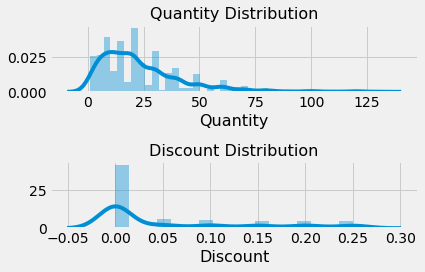

In [267]:
#dist plot of Quantity values
plt.subplot(211)
sns.distplot(df['Quantity'], hist='density')
plt.title('Quantity Distribution', fontsize=16)
plt.xlabel('Quantity', fontsize=16)
#dist plot of discount values
plt.subplot(212)
sns.distplot(df['Discount'], hist='density')
plt.title('Discount Distribution', fontsize=16)
plt.xlabel('Discount', fontsize=16)
plt.tight_layout()
plt.show()

In the first graph there is no normal distribution, the dependent variable "Quantity" is positively skewed. Many orders include only a small amount of items. There are less orders that contain a large amount of items. 
The independent variable "Discount" has an almost even distribution with the exception of there being a large amount of orders with no discount. The bins for the "Discount" histogram are set in increments (5%, 10%, 15%, 20%, 25%). 

The control group are orders that did not recieve a discount. The experimental group are orders that did recieve a discount. 

In [268]:
# create control and experimental groups
control = df[df['Discount'] == 0]
ctrl = control['Quantity']
experimental = df[df['Discount'] != 0]
exp= experimental['Quantity']

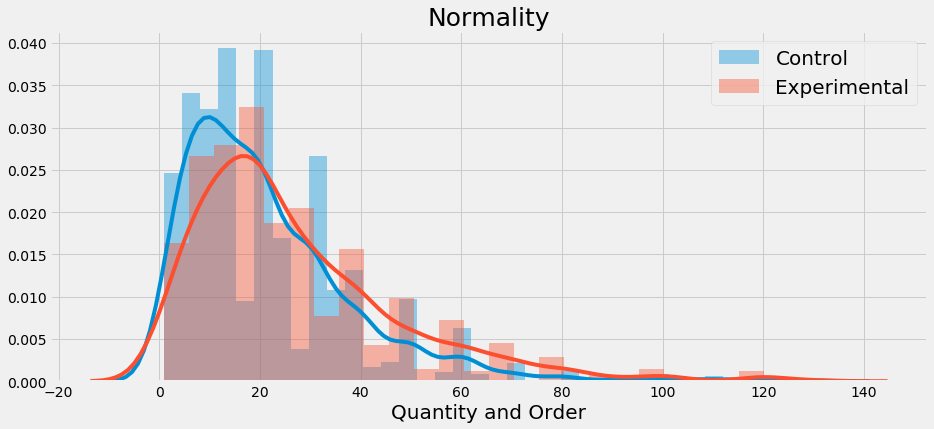

In [269]:
# Check for normality
plt.figure(figsize=(14,6))
sns.distplot(ctrl, label='Control')
sns.distplot(exp, label='Experimental',kde=True, hist=True )
plt.title('Normality', fontsize=25)
plt.xlabel('Quantity and Order', fontsize= 20)
plt.legend(fontsize= 20);

In [270]:
discounts_significance_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','Cohens d'], index=None)

discounts = [0.05, 0.1, 0.15, 0.2, 0.25]
control = df[df['Discount']==0]['Quantity']
for i in discounts:
    experimental = df[df['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(control, experimental)
    d = Cohen_d(experimental, control)
    discounts_significance_df = discounts_significance_df.append( { 'Discount %' : str(i*100)+'%' , 'Null Hypothesis' : 'Reject' if p < 0.025 else 'Failed', 'Cohens d' : d } , ignore_index=True)    

discounts_significance_df

,Discount %,Null Hypothesis,Cohens d
0,5.0%,Reject,0.346877
1,10.0%,Reject,0.195942
2,15.0%,Reject,0.372404
3,20.0%,Reject,0.300712
4,25.0%,Reject,0.366593


Result of the t-test shows that there is statistically significant difference in quantities between orders with no discount and applied discounts of 5%, 10%, 15%, 20%, 25%. We reject the null hypothesis. 

In [271]:
#Orders with discount
df_orderdis = pd.read_sql_query("""SELECT Quantity, Discount FROM [OrderDetail] WHERE Discount >0""", conn)
#Orders without discount
df_orderno = pd.read_sql_query("""SELECT Quantity, Discount FROM [OrderDetail] WHERE Discount ==0""", conn)
print(df_orderdis.describe())
print(df_orderno.describe())
df_orderdis.head()

         Quantity    Discount
count  838.000000  838.000000
mean    27.109785    0.144439
std     20.771439    0.071808
min      1.000000    0.010000
25%     12.000000    0.100000
50%     20.000000    0.150000
75%     36.000000    0.200000
max    130.000000    0.250000
          Quantity  Discount
count  1317.000000    1317.0
mean     21.715262       0.0
std      17.507493       0.0
min       1.000000       0.0
25%      10.000000       0.0
50%      18.000000       0.0
75%      30.000000       0.0
max     130.000000       0.0


,Quantity,Discount
0,35,0.15
1,15,0.15
2,6,0.05
3,15,0.05
4,40,0.05


In [272]:
dfw = welch_t(df_orderdis.Quantity,df_orderno.Quantity)
d = cohen_d(df_orderdis.Quantity,df_orderno.Quantity)

Welch's t-test = 6.239069142123973
p-value: 5.65641429030433e-10
DoF: 1561.7678231942148
Decision: Reject the null hypothesis
Cohens'd:  0.28641058366376676
Effect Size: Small


Result for Question 1: We reject the null hypothesis and accept the alternative hypothesis. There is an increase in order quantity due to discount. 

_______________

Question Two: Is there a significant difference in discounts given by employees from the United States and British Isles?

##### Null Hypothesis

- There is no difference in discounts given by employees in the United States and the British Isles.

##### Alternative Hypothesis

- There is a significant difference in discounts given by employees in the United States and the British Isles. 

In [273]:
countrydiscount = pd.read_sql_query("""SELECT OrderDetail.Discount, Employee.Country 
FROM [Order] AS [Order]
JOIN OrderDetail AS OrderDetail ON [Order].Id = OrderDetail.OrderId
JOIN Employee AS Employee ON [Order].EmployeeId = Employee.Id""", conn)
countrydiscount.head(2)

,Discount,Country
0,0.0,UK
1,0.0,UK


In [274]:
# ANOVA
formula = 'Discount ~ C(Country)'
lm = ols(formula, countrydiscount).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

               sum_sq      df         F    PR(>F)
C(Country)   0.067081     1.0  9.671415  0.001896
Residual    14.933259  2153.0       NaN       NaN


Result for Question 2: We reject the null hypothesis. There is a significant difference in the discount amount given by employees from United States and the British Isles. Employees from USA tend to give smaller discounts to their clients

____________________

Question Three: Is there a significant difference in total cost of orders by region?
#### Null Hypothesis

- There is no significant difference in total cost of orders by region.

#### Alternative Hypothesis

- There is a significant difference in total cost of orders by region.

In [275]:
dfregion = pd.read_sql_query("""SELECT Customer.Region, OrderDetail.OrderId, 
    OrderDetail.Quantity, OrderDetail.UnitPrice, OrderDetail.Discount
 FROM Customer 
 JOIN [Order] ON Customer.Id = [Order].CustomerId
 JOIN OrderDetail ON OrderDetail.OrderId = [Order].Id""", conn)

In [276]:
dfregion.head(2)

,Region,OrderId,Quantity,UnitPrice,Discount
0,Western Europe,10248,12,14.0,0.0
1,Western Europe,10248,10,9.8,0.0


In [277]:
dfregion.groupby('Region').count()

,OrderId,Quantity,UnitPrice,Discount
Region,,,,
British Isles,190,190,190,190
Central America,55,55,55,55
Eastern Europe,16,16,16,16
North America,427,427,427,427
Northern Europe,143,143,143,143
Scandinavia,70,70,70,70
South America,304,304,304,304
Southern Europe,137,137,137,137
Western Europe,736,736,736,736


Text(0.5, 1.0, 'Regions')

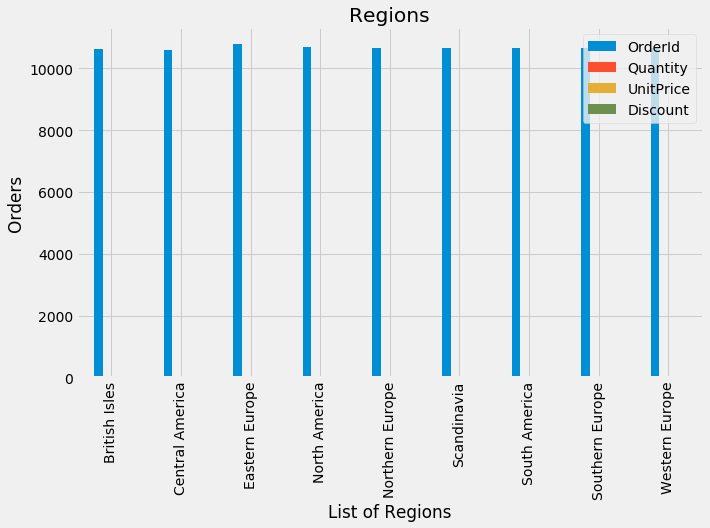

In [278]:
dfgraph = dfregion.groupby('Region').mean().plot(kind='bar', figsize=(10,6))
dfgraph.set_ylabel('Orders')
dfgraph.set_xlabel('List of Regions')
dfgraph.set_title('Regions')

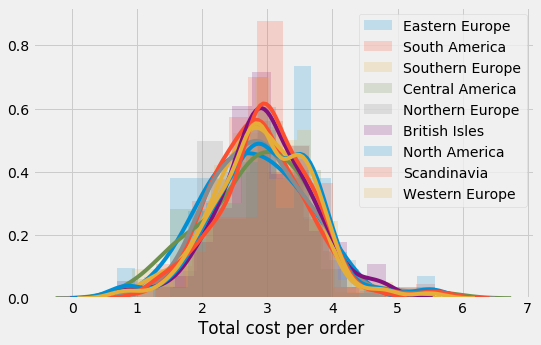

In [279]:
# region distribution
r_log = dfregion.copy()
r_log['UnitPrice'] = np.log(dfregion['UnitPrice'])
plt.figure(figsize=(8,5))
for region in set(r_log.Region):
    region_group = r_log.loc[r_log['Region'] == region]
    sns.distplot(region_group['UnitPrice'], hist_kws=dict(alpha=0.2), label=region)
    plt.legend()
    plt.xlabel('Total cost per order ')

In [280]:
# ANOVA table
lm = ols('UnitPrice ~ C(Region)', r_log).fit()
sm.stats.anova_lm(lm, typ=2)

,sum_sq,df,F,PR(>F)
C(Region),5.303353,8.0,1.12672,0.341687
Residual,1217.320234,2069.0,NaN,NaN


Result for Question 3: We reject the null hypothesis and accept the alternate hypothesis. The p-value is lower than the alpha value of 0.05. There is a significant difference in total cost of orders by region. The cost for each region varies a lot. 

__________

Question Four: Is there a significant difference in using local shipping in terms of cost for carriers?
##### Null Hypothesis

- There is no significant difference by using local shipping in terms of cost. 

##### Alternative Hypothesis

- There is a significant difference by using local shipping in terms of cost. 

In [281]:
carrier_cost = pd.read_sql_query("""SELECT Supplier.Region, [Order].ShipRegion, [Order].freight
                            FROM [Order] AS [Order]
                          JOIN [OrderDetail] AS OrderDetail ON [Order].ID == OrderDetail.OrderID
                          JOIN [Product] AS Product ON OrderDetail.ProductID == Product.ID
                          JOIN [Supplier] AS Supplier ON Supplier.ID == Product.SupplierID""", conn)

In [282]:
carrier_cost.head(2)

,Region,ShipRegion,Freight
0,Southern Europe,Western Europe,32.38
1,South-East Asia,Western Europe,32.38


In [283]:
c_cost = carrier_cost[carrier_cost['Region'] == carrier_cost['ShipRegion']]['Freight']
print('c_cost statistics',c_cost.describe())


c_cost statistics count     299.000000
mean      117.629331
std       159.332480
min         0.150000
25%        23.290000
50%        64.560000
75%       147.060000
max      1007.640000
Name: Freight, dtype: float64


In [284]:
e_cost = freight_region[freight_region['Region']!=freight_region['ShipRegion']]['Freight']
print('e_cost statistics',e_cost.describe())


e_cost statistics count    1856.000000
mean       92.745113
std       127.982115
min         0.020000
25%        18.635000
50%        52.920000
75%       112.490000
max      1007.640000
Name: Freight, dtype: float64


In [285]:
print('Equal variance test:')
if stats.levene(c_cost,e_cost)[1]<0.05:
    print('Input samples are not from populations with equal variances.')
else:
    print('Input samples are from populations with equal variances.')
print('Hypothesis Testing:')
welch1 = welch_t(c_cost,e_cost)
print('Effect size Testing:')
d = cohen_d(c_cost,e_cost)

Equal variance test:
Input samples are not from populations with equal variances.
Hypothesis Testing:
Welch's t-test = 2.570292317793137
p-value: 0.010559865355354837
DoF: 362.538552340464
Decision: Reject the null hypothesis
Effect size Testing:
Cohens'd:  0.18751968413624498
Effect Size: Small


Result for Question 4: We reject the null hypothesis and accept the alternate hypothesis. There is a significant difference by using local shipping in terms of cost.   

___________________

## Conclusion

- Discounts of 5%, 15%, 20% and 25% have approximately the same effect on order quantity. But there is a difference when there is no discount added to a product. 
- Employees from US sold more product with lower discount, though order quantity is the same as employees from the UK. The US employees did better profit wise because they gave fewer discounts. 
- Between different regions, certain regions like Western Europe placed more orders. The North American region spends more on products per order in comparison to other regions. 
- Locally shipped orders have a higher carrier cost. Local shipping is on average more expensive. 


- Find out why employees from US had much more orders than from UK 
- Research further in which regions that clients responded better to discounts. 
- Focus on regions that do not contribute as much to Northwind sales. 
- Figure out why local shipping is more expensive!

____________